In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import  precision_score, recall_score, accuracy_score, confusion_matrix

In [46]:
df= pd.read_csv("BMW_sales_data_(2010-2024).csv")


In [47]:
# Initial Data Preview
df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [48]:
# Dataset Structure & Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [49]:
# Convert Year to datetime 
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')  

df['Year'].dtype

dtype('<M8[ns]')

In [50]:
# Statistical Summary of Numerical Features
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017-01-06 08:02:10.176000,3.247180,100307.203140,75034.600900,5067.514680
min,2010-01-01 00:00:00,1.500000,3.000000,30000.000000,100.000000
25%,2013-01-01 00:00:00,2.400000,50178.000000,52434.750000,2588.000000
50%,2017-01-01 00:00:00,3.200000,100388.500000,75011.500000,5087.000000
75%,2021-01-01 00:00:00,4.100000,150630.250000,97628.250000,7537.250000
max,2024-01-01 00:00:00,5.000000,199996.000000,119998.000000,9999.000000
std,NaN,1.009078,57941.509344,25998.248882,2856.767125


In [51]:
# Checking missing value
df.isnull().sum()


Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

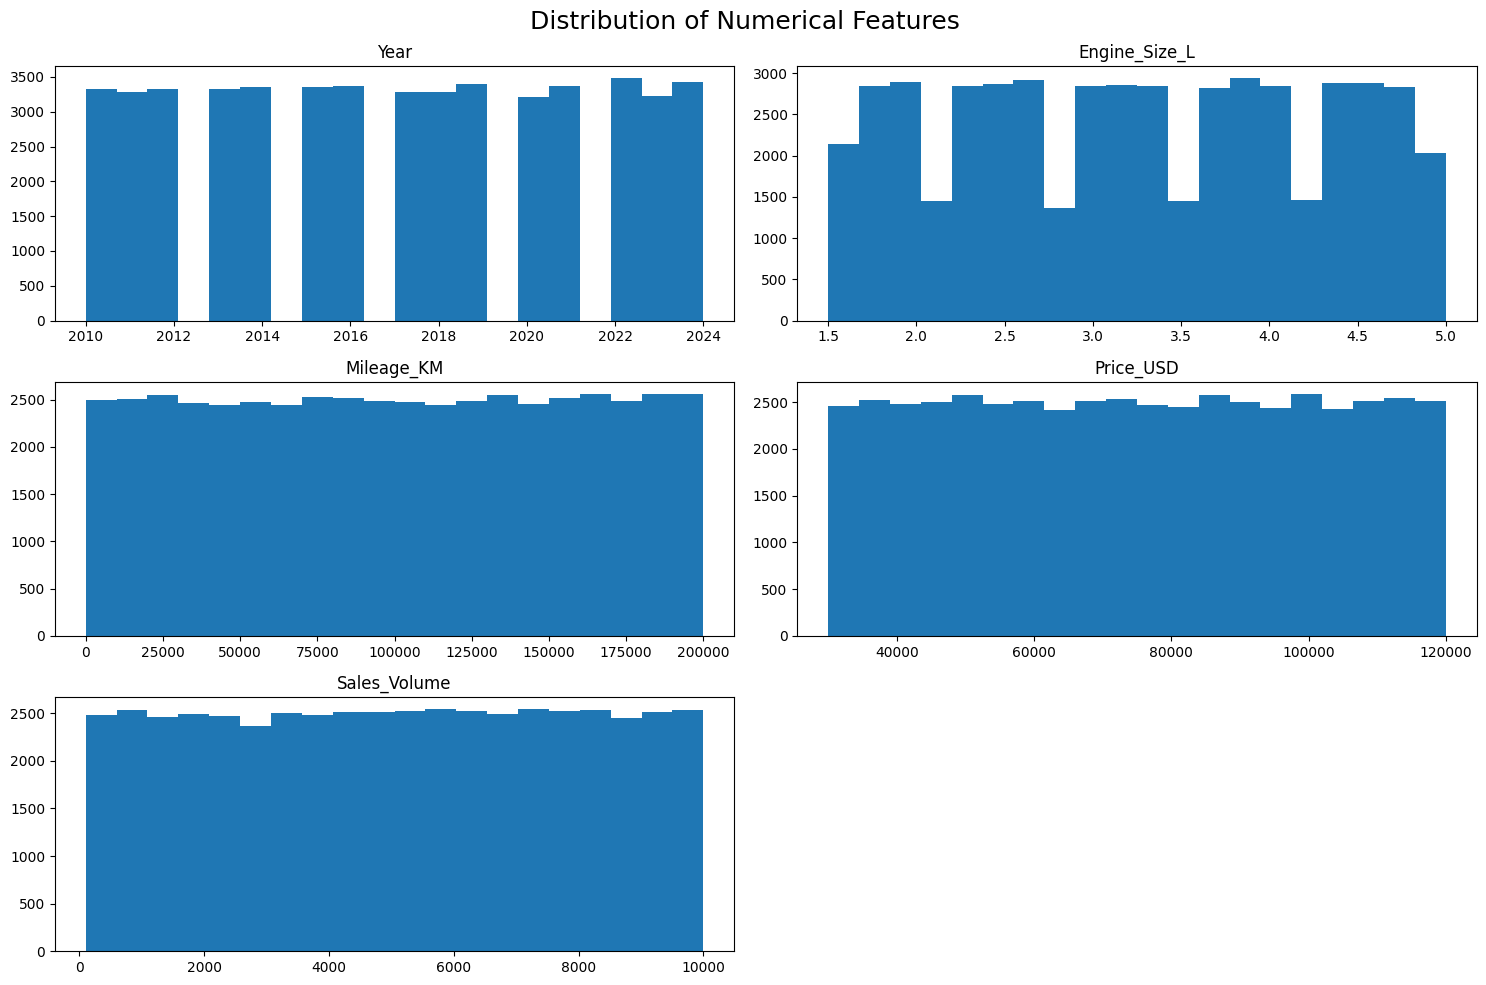

In [52]:
# Univariate Analysis 
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()

['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']


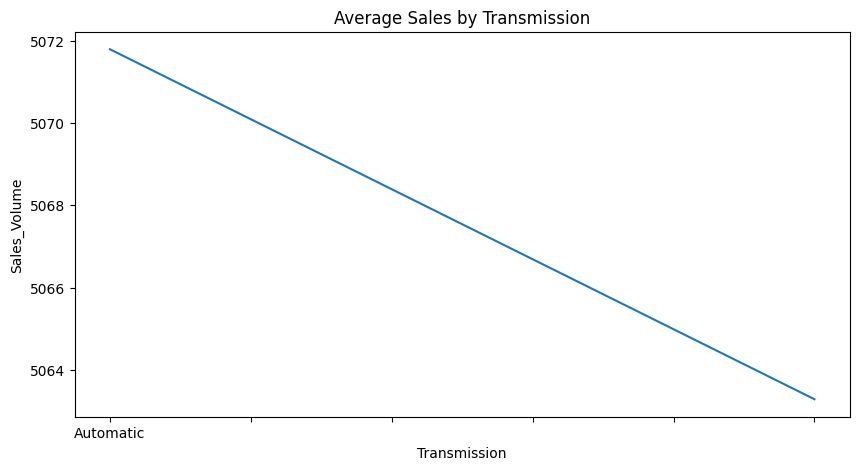

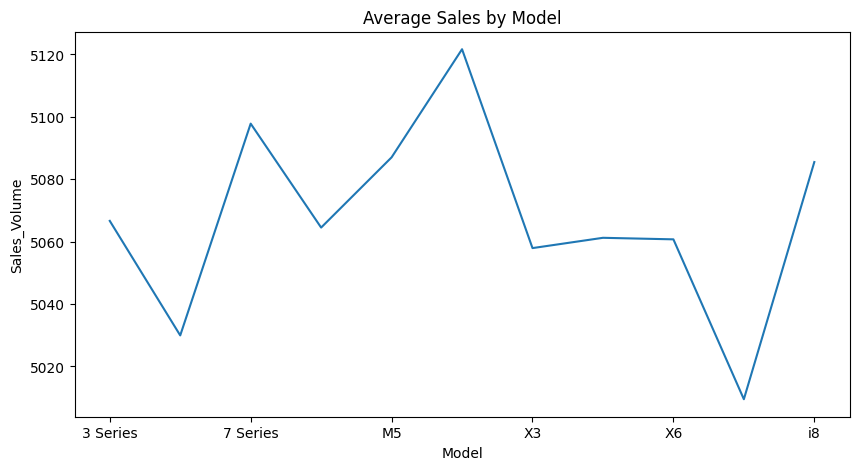

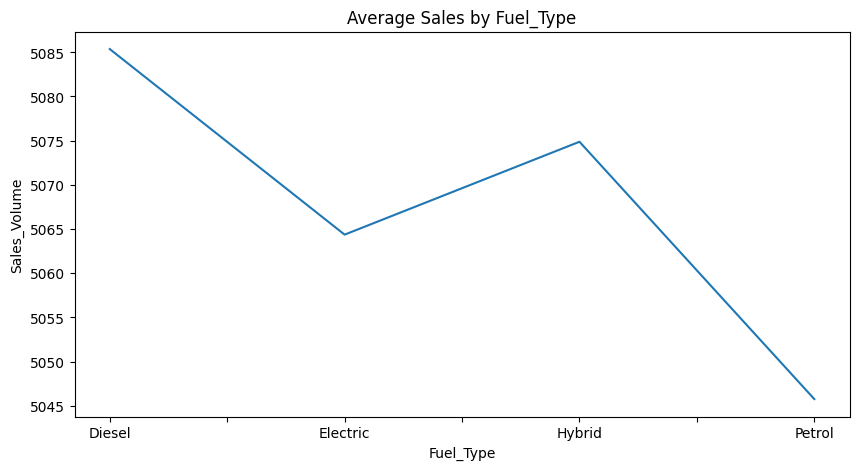

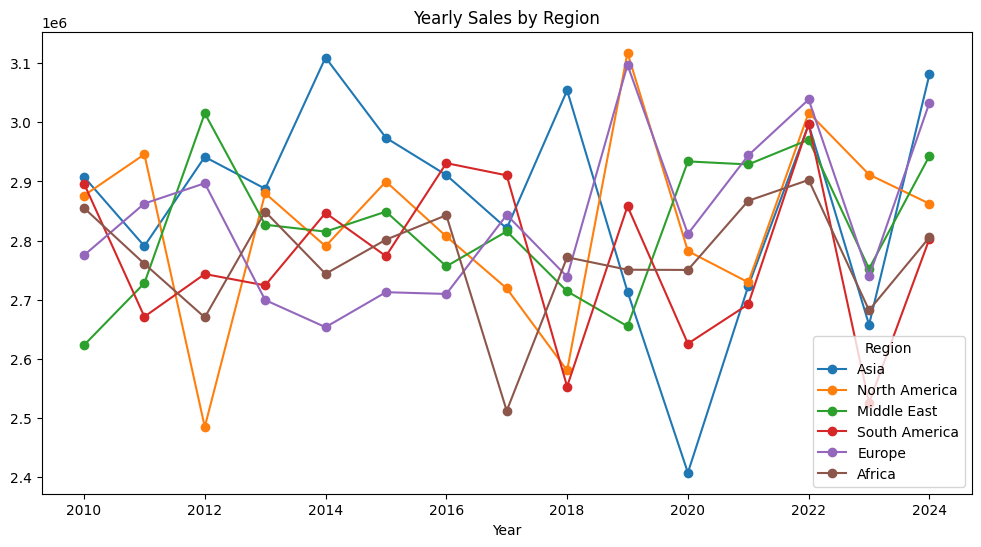

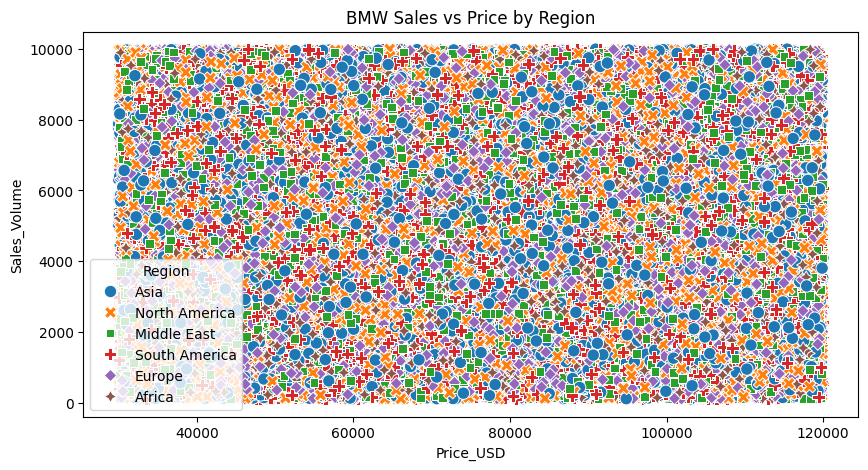

In [53]:
# Available Columns in Dataset
print(df.columns.tolist())

# Bi-variate Analysis (Sales vs another variable)
other_variables = ['Transmission', 'Model', 'Fuel_Type']
for var in other_variables:
    df.groupby(var)["Sales_Volume"].mean().plot(figsize=(10, 5), ylabel=('Sales_Volume'),title=f"Average Sales by {var}")
    plt.show()


# Yearly Sales Trends by Region
plt.figure(figsize=(12,6))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    region_data.groupby(region_data['Year'].dt.year)['Sales_Volume'].sum().plot(label=region, marker='o')
plt.legend(title='Region')
plt.title("Yearly Sales by Region")
plt.show()


# BMW vs Salse by Region
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Price_USD', y='Sales_Volume', data=df, hue='Region', style='Region', s=80)
plt.title("BMW Sales vs Price by Region")
plt.show()



['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']
Numerical columns: ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
               Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
Engine_Size_L       1.000000   -0.004906   0.000146     -0.003942
Mileage_KM         -0.004906    1.000000  -0.004238      0.001434
Price_USD           0.000146   -0.004238   1.000000      0.000080
Sales_Volume       -0.003942    0.001434   0.000080      1.000000


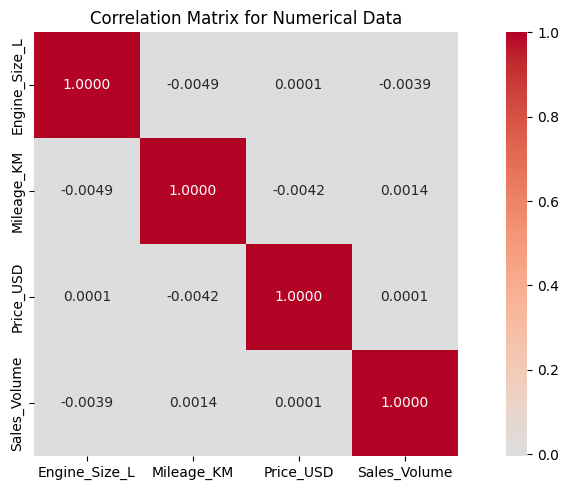

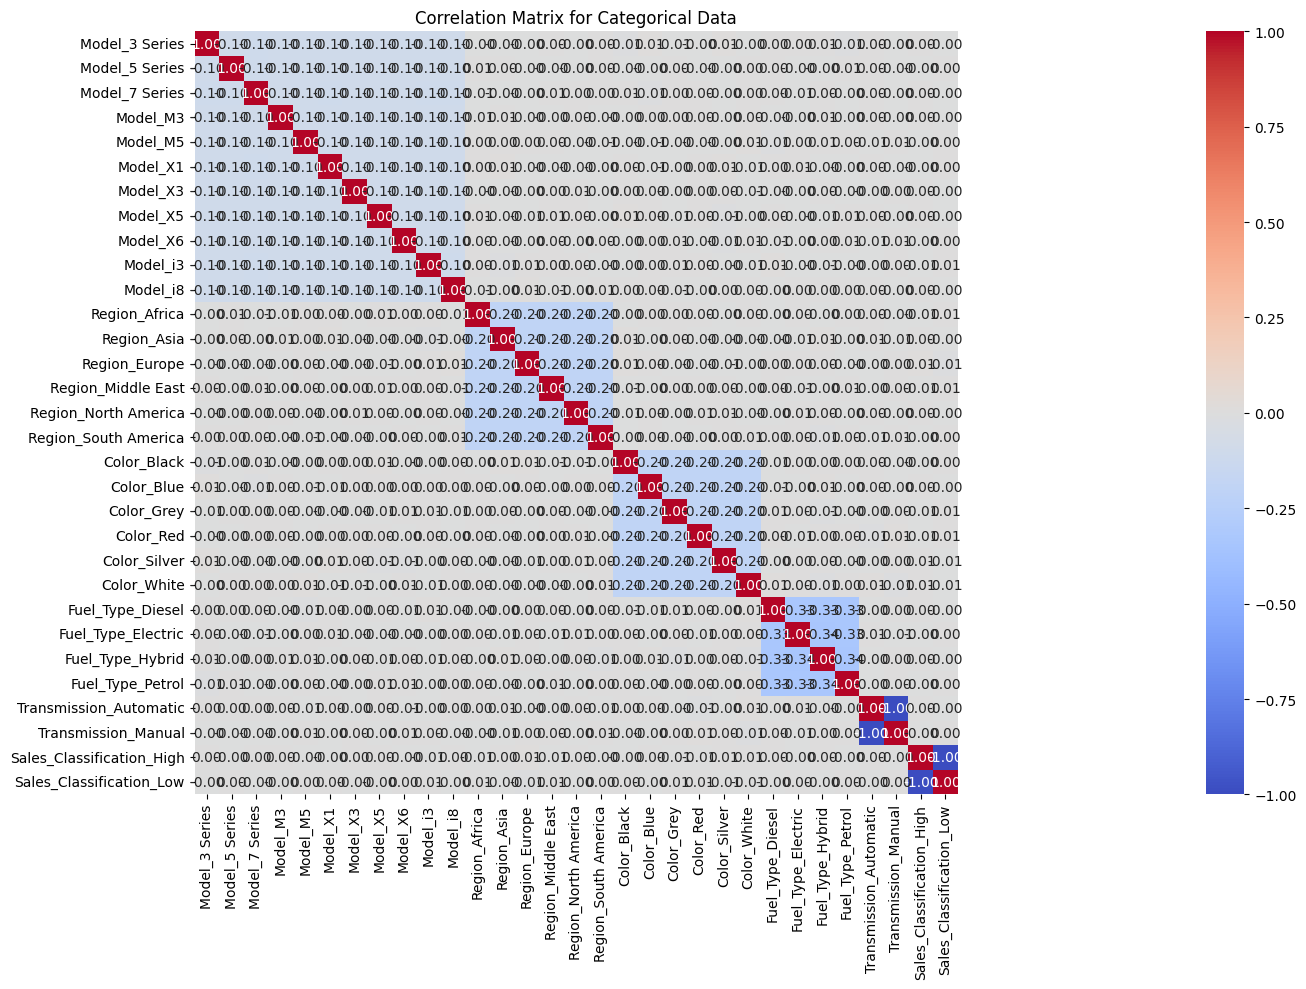

In [54]:
print(df.columns.tolist())

# Numerical columns for correlation
numerical_cols=df.select_dtypes(include='number').columns
print("Numerical columns:", numerical_cols.tolist())

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)

# Visualize with heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.4f')
plt.title('Correlation Matrix for Numerical Data')
plt.tight_layout()
plt.show()

# Categorical columns for correlation
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']


# One-hot encode
df_encoded = pd.get_dummies(df[categorical_cols], columns=categorical_cols)
corr_matrix = df_encoded.corr()

plt.figure(figsize=(50, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix for Categorical Data')
plt.tight_layout()
plt.show()




In [55]:
# Split data
X_numerical = df.select_dtypes(include="number").drop('Sales_Volume', axis=1)
y = df['Sales_Volume']

X_full_train, X_test, y_full_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.2, random_state=1)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")
X_train




Train size: 32000
Validation size: 8000
Test size: 10000


,Engine_Size_L,Mileage_KM,Price_USD
1364,4.0,31766,92328
897,4.1,154289,66188
48634,4.4,136675,117676
221,4.5,122956,53097
4401,4.3,17779,64280
...,...,...,...
45445,4.3,76843,64337
7413,4.5,51337,39383
20676,2.3,142592,94459
49749,4.8,115367,58789


In [56]:
# ROC AUC feature importance

y_binary_values = {'Above_Median': (y_train > y_train.median()).astype(int), 'Above_Mean': (y_train > y_train.mean()).astype(int), 
                'Top_25%': (y_train > y_train.quantile(0.75)).astype(int),'Bottom_25%': (y_train < y_train.quantile(0.25)).astype(int)}


for strategy_name, y_binary in y_binary_values.items():
    print(f"{strategy_name}:")
    X_train_numerical=X_train.select_dtypes(include=["int64", "float64"])
    for col in X_train_numerical.columns:
        fpr, tpr, thresholds = roc_curve(y_binary, X_train_numerical[col])
        auc_score = auc(fpr, tpr)
        print(f"{col}: {auc_score}")

Above_Median:
Engine_Size_L: 0.49323568942670193
Mileage_KM: 0.49901013085550827
Price_USD: 0.49650879100198747
Above_Mean:
Engine_Size_L: 0.4933511822400667
Mileage_KM: 0.49867043371709746
Price_USD: 0.4967868167032038
Top_25%:
Engine_Size_L: 0.4974104609375
Mileage_KM: 0.5022099713541667
Price_USD: 0.4983140286458333
Bottom_25%:
Engine_Size_L: 0.5040639612657102
Mileage_KM: 0.5016530229340936
Price_USD: 0.5019513747489451


In [57]:
# Train the different model

model_lr= LinearRegression()
model_lr.fit(X_train, y_train)

model_dt=DecisionTreeRegressor(max_depth=1, random_state=1)
model_dt.fit(X_train, y_train)

model_rf= RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=10)
model_rf.fit(X_train, y_train)

def calculation(model, X_val, y_val):
    y_predict= model.predict(X_val)
    mae = mean_absolute_error
    rmse=np.sqrt(root_mean_squared_error(y_val, y_predict))
    r2= r2_score(y_val, y_predict) 
    return mae, rmse, r2

# Calculate metrics for all models
print("Linear Regression:")
mae_lr, rmse_lr, r2_lr = calculation(model_lr, X_val, y_val)
print(f"Meaan absolute error:{mae_lr}, Root mean square error:{rmse_lr}, r2 error:{r2_lr} ")

print("Decision Tree:")
mae_dt, rmse_dt, r2_dt = calculation(model_dt, X_val, y_val)
print(f"Meaan absolute error:{mae_dt}, Root mean square error:{rmse_dt}, r2 error:{r2_dt} ")

print("Random Forest:")
mae_rf, rmse_rf, r2_rf = calculation(model_rf, X_val, y_val)
print(f"Meaan absolute error:{mae_rf}, Root mean square error:{rmse_rf}, r2 error:{r2_rf} ")

Linear Regression:
Meaan absolute error:<function mean_absolute_error at 0x0000020868326AC0>, Root mean square error:53.42575180043488, r2 error:-0.00040195109536100837 
Decision Tree:
Meaan absolute error:<function mean_absolute_error at 0x0000020868326AC0>, Root mean square error:53.42462401481937, r2 error:-0.0003174822264742083 
Random Forest:
Meaan absolute error:<function mean_absolute_error at 0x0000020868326AC0>, Root mean square error:55.71800989364456, r2 error:-0.18346207649580148 


In [58]:
# Calculation of precision and recall using 'Sales_Classification' as a target variable

X = df.select_dtypes(include="number")      
y = df['Sales_Classification']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.2, random_state=1)


model_lc=LogisticRegression()
model_lc.fit(X_train, y_train)

model_dtc=DecisionTreeClassifier(max_depth=1, random_state=1)
model_dtc.fit(X_train, y_train)

model_rfc= RandomForestClassifier(random_state=1, n_jobs=-1, n_estimators=10)
model_rfc.fit(X_train, y_train)

POS_LABEL = "High"

def precision_recall(model, X_val, y_val):
    y_pred = model.predict(X_val)
    precision = precision_score(y_val, y_pred, pos_label=POS_LABEL)
    recall = recall_score(y_val, y_pred, pos_label=POS_LABEL)
    return precision, recall


# Calculation of precision & recall for all models

prec_lc, rec_lc   = precision_recall(model_lc,  X_val, y_val)
prec_dtc, rec_dtc = precision_recall(model_dtc, X_val, y_val)
prec_rfc, rec_rfc = precision_recall(model_rfc, X_val, y_val)


# Print results

print("Logistic Regression: Precision =", prec_lc,  " Recall =", rec_lc)
print("Decision Tree : Precision =", prec_dtc, " Recall =", rec_dtc)
print("Random Forest : Precision =", prec_rfc, " Recall =", rec_rfc)



# Calculation of Accuracy
acc_lc  = accuracy_score(y_val, model_lc.predict(X_val))
acc_dtc = accuracy_score(y_val, model_dtc.predict(X_val))
acc_rfc = accuracy_score(y_val, model_rfc.predict(X_val))

print("\nAccuracy:")
print("Logistic Regression:", acc_lc)
print("Decision Tree :", acc_dtc)
print("Random Forest :", acc_rfc)

# Calculation of Confusion Matrix 

print("\nConfusion Matrix for Logistic Regression")
print(confusion_matrix(y_val, model_lc.predict(X_val)))

print("\nConfusion Matrix for Decision Tree")
print(confusion_matrix(y_val, model_dtc.predict(X_val)))

print("\nConfusion Matrix for Random Forest")
print(confusion_matrix(y_val, model_rfc.predict(X_val)))

C:\Users\ahwal\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Precision = 0.9987587918907737  Recall = 0.9983457402812241
Decision Tree : Precision = 1.0  Recall = 1.0
Random Forest : Precision = 1.0  Recall = 1.0

Accuracy:
Logistic Regression: 0.999125
Decision Tree : 1.0
Random Forest : 1.0

Confusion Matrix for Logistic Regression
[[2414    4]
 [   3 5579]]

Confusion Matrix for Decision Tree
[[2418    0]
 [   0 5582]]

Confusion Matrix for Random Forest
[[2418    0]
 [   0 5582]]


In [59]:
with open('Decision_Tree.pkl', 'wb') as File:
    pickle.dump(model_dt, File)

